   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


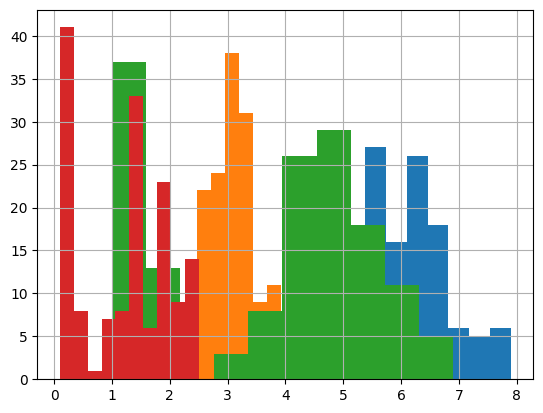

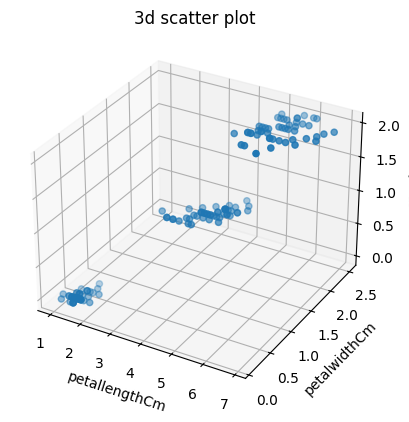

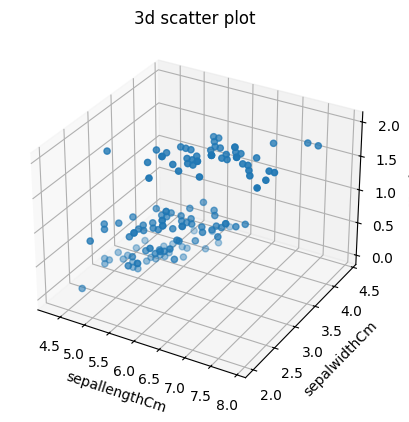

Logistic Regression accuracy: 100.00%
K-Nearest Neighbors accuracy: 100.00%
Decision Tree accuracy: 100.00%


NameError: name 'sse' is not defined

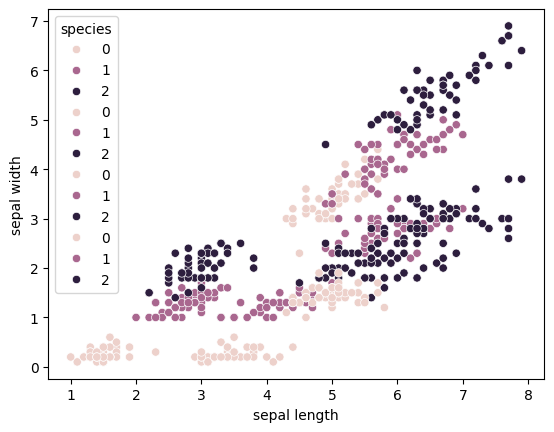

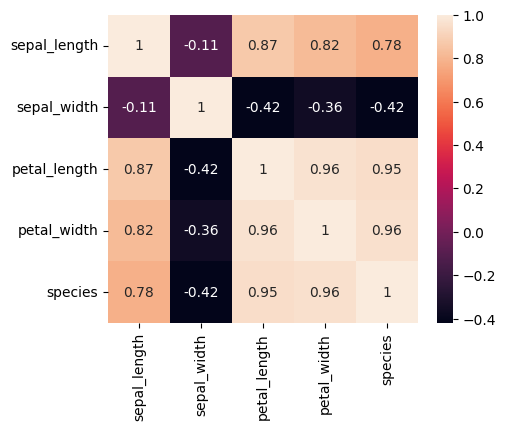

In [13]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = R'C:\Users\sowba\OneDrive\Documents\pyhton project\IRIS.csv'
df = pd.read_csv(file_path)

print(df.head())

df['species'],categories=pd.factorize(df['species'])
df.head()

df.describe()

df.info()

df.isna().sum()

df['sepal_length'].hist()

df['sepal_width'].hist()

df['petal_length'].hist()

df['petal_width'].hist()

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petallengthCm')
ax.set_ylabel('petalwidthCm')
ax.set_zlabel('species')
plt.title('3d scatter plot')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('sepallengthCm')
ax.set_ylabel('sepalwidthCm')
ax.set_zlabel('species')
plt.title('3d scatter plot')
plt.show()

sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species');
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species');

sns.scatterplot(data=df,x='sepal_length',y='petal_length',hue='species');

sns.scatterplot(data=df,x='sepal_width',y='petal_width',hue='species');

df.corr()

corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # Corrected method name
df.head()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

x = df.drop('species', axis=1)  # Features
y = df['species']  # Target label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def evaluate_model(model, model_name):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_percentage = accuracy * 100
    print(f'{model_name} accuracy: {accuracy_percentage:.2f}%')

# Logistic Regression
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
evaluate_model(logistic_model, "Logistic Regression")

# K-Nearest Neighbors
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
evaluate_model(knn_model, "K-Nearest Neighbors")

# Decision Tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, "Decision Tree")

sse

plt.xlabel('k_rng')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)

km=KMeans(n_clusters=3,random_state=0)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

df['clusters']=y_predicted
df.head(150)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.clusters)
cm

true_labels = df.species
predicted_labels = df.clusters
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels)) 
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i][j] > cm.max() / 2 else 'black')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout() 
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier()
evaluate_model(rf_model, "Random Forest")

# Support Vector Machine
svm_model = make_pipeline(StandardScaler(), SVC())
evaluate_model(svm_model, "Support Vector Machine")


Random Forest accuracy: 100.00%
Support Vector Machine accuracy: 100.00%


In [14]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
logistic_cv = cross_val_score(logistic_model, x, y, cv=5)
print(f"Logistic Regression CV Accuracy: {logistic_cv.mean():.2f} ± {logistic_cv.std():.2f}")


Logistic Regression CV Accuracy: 0.96 ± 0.04


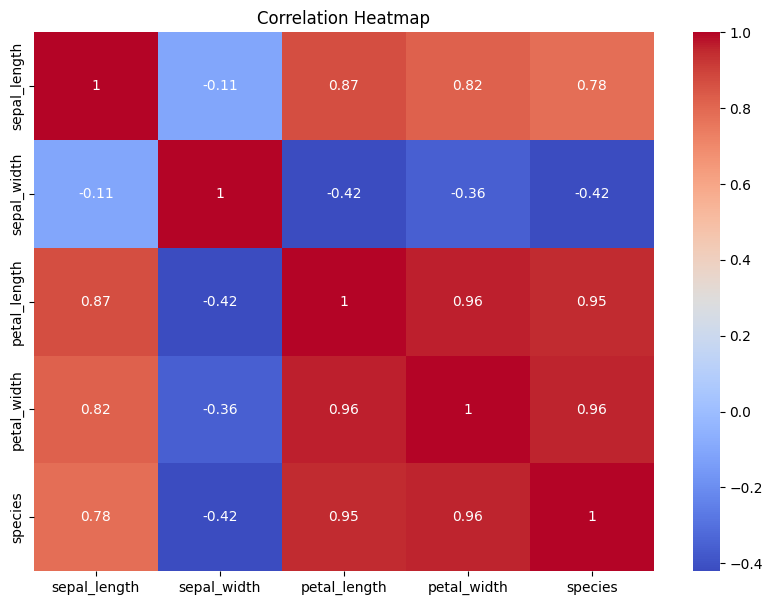

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
